In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

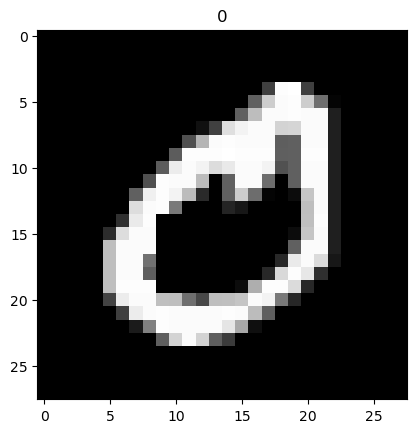

In [3]:
# Obtendo os dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualizando imagem especifica
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [4]:
# Mudando dimensão, dimensão original era 28x28, preciso de 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformando dados para float para poder normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalizando(255 = valor máximo de 1 pixel)
X_treinamento /= 255 
X_teste /= 255

In [7]:
# Transformando para o formato dummy (Temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [10]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar overfitting
modelo = Sequential()
modelo.add(Dense(units=64, activation= 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation= 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation= 'relu'))
modelo.add(Dropout(0.2))
# Camada de saída, softmax probalidade
modelo.add(Dense(units=10, activation= 'softmax'))

In [11]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Configurando parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs= 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7530 - loss: 0.7475 - val_accuracy: 0.9510 - val_loss: 0.1624
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9299 - loss: 0.2378 - val_accuracy: 0.9586 - val_loss: 0.1408
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9429 - loss: 0.1954 - val_accuracy: 0.9661 - val_loss: 0.1136
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9523 - loss: 0.1671 - val_accuracy: 0.9687 - val_loss: 0.1067
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9561 - loss: 0.1531 - val_accuracy: 0.9680 - val_loss: 0.1052
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1409 - val_accuracy: 0.9691 - val_loss: 0.1052
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9606 - loss: 0.1308 - val_accuracy: 0.9727 - val_loss: 0.0947
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1209 - 

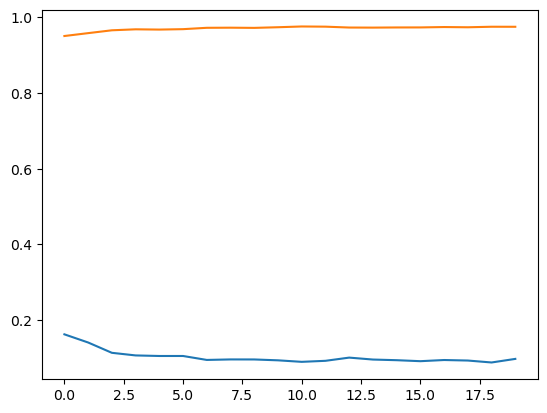

In [15]:
# Gráfico para visualizar erros e accuracy
historico.history.keys()
# Evolução do erro, azul
plt.plot(historico.history['val_loss'])
# Performace da rede
plt.plot(historico.history['val_accuracy'])

In [16]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.4618211e-16, 1.4158501e-10, 5.5944400e-09, ..., 9.9999499e-01,
        5.8477463e-12, 4.7239769e-06],
       [1.8750581e-11, 3.5620746e-09, 9.9999821e-01, ..., 3.4725237e-10,
        6.1495323e-11, 1.7592485e-14],
       [1.5847282e-11, 9.9985671e-01, 1.1122306e-06, ..., 5.8634596e-05,
        7.5589538e-05, 2.5245360e-08],
       ...,
       [1.8767810e-11, 3.4665397e-09, 1.2481543e-07, ..., 5.2275840e-07,
        3.0455520e-09, 1.9840470e-06],
       [3.1450734e-12, 1.4303713e-13, 4.6699073e-12, ..., 4.7865059e-13,
        1.9876891e-09, 2.2251383e-09],
       [5.9719911e-12, 5.1348794e-20, 1.0606469e-13, ..., 8.2314243e-24,
        3.2689362e-13, 5.6750442e-19]], dtype=float32)

In [17]:
# valor máximo (com probalidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 972,    0,    0,    2,    0,    1,    2,    1,    2,    0],
       [   0, 1125,    2,    3,    0,    1,    1,    1,    2,    0],
       [   4,    0, 1012,    5,    1,    0,    2,    5,    3,    0],
       [   2,    0,    6,  989,    0,    3,    0,    4,    4,    2],
       [   2,    0,    1,    0,  958,    0,    7,    5,    1,    8],
       [   4,    0,    1,   14,    1,  861,    4,    4,    1,    2],
       [   7,    2,    1,    0,    3,    7,  936,    0,    2,    0],
       [   1,    4,    9,    4,    1,    0,    0, 1006,    0,    3],
       [   6,    0,    8,   10,    5,    8,    1,    7,  926,    3],
       [   6,    5,    1,    5,   10,    1,    0,    6,    6,  969]])